# Description:

---


In today's lab, we will review concepts from the first semester that will be useful for us to implement more complex quantum circuits going forward.

---



**[ADVANCED] Then, we will delve into the practical implementation of the Quantum Teleportation protocol through Cirq. Our objectives for this session are threefold:**

* To grasp one of the foundational Quantum Protocols, providing essential knowledge for those involved in this field.

* To lay a solid foundation for our upcoming discussions on Quantum Networking, which is just a few weeks away.

* To seize the opportunity to brush up on your skills in coding quantum circuits using Cirq.

# Before starting, run the code below to import all necessary functions and libraries.

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]
plt.rcParams.update({'font.size': 8})
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install cirq --quiet
    import cirq
    print("installed cirq.")

installing cirq...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.4 MB/s eta 0:00:0

# Part 1: Quantum Circuits

---

In this part, you will review how to create and work with quantum circuits in Cirq.

# Problem #1.1

---


Together, create a qubit and an empty circuit. Apply an X gate to the qubit. Outout your circuit. Output your final state vector in ket notation.

In [2]:
my_qubit = cirq.NamedQubit("q0")
my_circuit = cirq.Circuit()
my_circuit.append(cirq.X(my_qubit))
my_circuit

q0: ───X───

In [3]:
cirq.dirac_notation(cirq.final_state_vector(my_circuit))

'|1⟩'

# Problem #1.2

---


Together, create two qubits and an empty circuit. Apply an X gate to the first qubit and an H gate to the second qubit. Output the circuit and output the final state vector in ket notation.

In [4]:
my_qubits = cirq.NamedQubit.range(2, prefix = "q")
my_circuit = cirq.Circuit()
my_circuit.append(cirq.X(my_qubits[0]))
my_circuit.append(cirq.H(my_qubits[1]))
my_circuit

q0: ───X───

q1: ───H───

In [5]:
cirq.dirac_notation(cirq.final_state_vector(my_circuit))

'0.71|10⟩ + 0.71|11⟩'

# Problem #1.3

---


Together, create 5 qubits and an empty circuit. Append a measurement to each qubit and output your circuit. Then simulate the results of your circuit.

In [6]:
my_qubits = cirq.NamedQubit.range(5, prefix = "q")
my_circuit = cirq.Circuit()
my_circuit.append(cirq.measure(my_qubits))
my_circuit

q0: ───M───
       │
q1: ───M───
       │
q2: ───M───
       │
q3: ───M───
       │
q4: ───M───

In [7]:
sim = cirq.Simulator()
results = sim.run(my_circuit)
results

q0,q1,q2,q3,q4=0, 0, 0, 0, 0

# Problem #1.4

---


Independently, create a qubit and an empty circuit. Append an H gate to your qubit. Output your circuit and output the final state vector in ket notation.

In [8]:
my_qubit = cirq.NamedQubit("q0")
my_circuit = cirq.Circuit()
my_circuit.append(cirq.H(my_qubit))
my_circuit

q0: ───H───

In [9]:
cirq.dirac_notation(cirq.final_state_vector(my_circuit))

'0.71|0⟩ + 0.71|1⟩'

# Problem #1.5

---


Independently, create 3 qubits and an empty circuit. Append an X gate to the first qubit, an H gate to each qubit, and a Z gate to the final qubit. Output your circuit and the final state vector in ket notation.

In [10]:
my_qubits = cirq.NamedQubit.range(3, prefix = "q")
my_circuit = cirq.Circuit()
my_circuit.append(cirq.X(my_qubits[0]))
my_circuit.append(cirq.H.on_each(my_qubits))
my_circuit.append(cirq.Z(my_qubits[2]))
my_circuit

q0: ───X───H───

q1: ───H───────

q2: ───H───Z───

In [11]:
cirq.dirac_notation(cirq.final_state_vector(my_circuit))

'0.35|000⟩ - 0.35|001⟩ + 0.35|010⟩ - 0.35|011⟩ - 0.35|100⟩ + 0.35|101⟩ - 0.35|110⟩ + 0.35|111⟩'

# Problem #1.6

---


Independently, create two qubits and an empty qircuit. Append an H gate to the first, a CNOT gate such that the first qubit is the control qubit and the second qubit is the target qubit, and an H gate to the second qubit. Output your circuit and the final state vector in ket notation.

In [12]:
my_qubits = cirq.NamedQubit.range(2, prefix="q")
my_circuit = cirq.Circuit()
my_circuit.append(cirq.H(my_qubits[0]))
my_circuit.append(cirq.CNOT(my_qubits[0], my_qubits[1]))
my_circuit.append(cirq.H(my_qubits[1]))
my_circuit

q0: ───H───@───────
           │
q1: ───────X───H───

In [13]:
cirq.dirac_notation(cirq.final_state_vector(my_circuit))

'0.5|00⟩ + 0.5|01⟩ + 0.5|10⟩ - 0.5|11⟩'

# Problem #1.7

---


Independently, are the states of the two qubits from Problem #1.6 entangled? Why or why not?

In [14]:
print("No, because of the second H gate, the state of one qubit tells us nothing about the state of the other.")

No, because of the second H gate, the state of one qubit tells us nothing about the state of the other.


# Problem #1.8

---


Indepently, create a 3 qubits. Apply an H gate to the first two qubits, a CNOT gate such that the first qubit is the control qubit and the third is the target qubit, and a measurement to each qubit. Output your circuit and simulate the results of your circuit 100 times. Plot the results on a histogram.

In [15]:
my_qubits = cirq.NamedQubit.range(3, prefix = "q")
my_circuit = cirq.Circuit()
my_circuit.append(cirq.H.on_each(my_qubits[:2]))
my_circuit.append(cirq.CNOT(my_qubits[0], my_qubits[2]))
my_circuit.append(cirq.measure(my_qubits))
my_circuit

q0: ───H───@───M───
           │   │
q1: ───H───┼───M───
           │   │
q2: ───────X───M───

In [16]:
sim = cirq.Simulator()
result = sim.run(my_circuit, repetitions = 100)

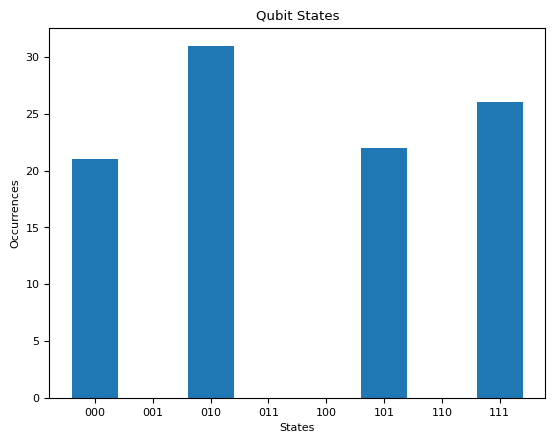

In [17]:
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(3))

plt.show()

# Problem #1.9

---


Are the first and third qubits from Problem #1.8 entangled? Why or why not?

In [20]:
print("Yes. They are entangled such that they are always in the same state.")

Yes. They are entangled such that they are always in the same state.


# Part 2: Implementing Quantum Teleportation

---


In this section, we will work together to implement Quantum Teleportation.

# Step 1: Alice and Bob share a Bell pair and go their separate ways.
**Together, let's create a circuit as follows:**

* It has one qubit that represents the message to be sent, one for Alice, and one for Bob.
* It has one classical bit for each qubit measurement.
* Creates a Bell state with Alice's and Bob's qubits.

In [21]:
# Instantiate the circuit
circuit = cirq.Circuit()

# Define three qubits
msg = cirq.NamedQubit("Message")
alice = cirq.NamedQubit("Alice")
bob = cirq.NamedQubit("Bob")

# Entangle Alice and Bob's qubits
circuit.append([cirq.H(alice), cirq.CNOT(alice, bob)])

# You can visualize the circuit if needed
print(circuit)

Alice: ───H───@───
              │
Bob: ─────────X───


# Step 2. Alice prepares a special state to teleport to Bob.

---


Together, prepare the teleportation qubit in the  |1⟩  state.

In [22]:
# PREPARE THE |1> STATE
circuit.append([cirq.X(msg)])

# You can visualize the circuit if needed
print(circuit)

Alice: ─────H───@───
                │
Bob: ───────────X───

Message: ───X───────


# Step 3. Alice measures her half of the entangled pair and her special state in the “Entangled basis”.

---


Together, add the following to the quantum circuit:

* A CX gate applied to the message and Alice's qubits.
* An H gate applied to the message qubit.
* A measurement of the message and Alice's qubits.

In [23]:
circuit.append([cirq.CNOT(msg, alice), cirq.H(msg), cirq.measure(msg, alice)])
# You can visualize the circuit if needed
print(circuit)

Alice: ─────H───@───X───────M───
                │   │       │
Bob: ───────────X───┼───────┼───
                    │       │
Message: ───X───────@───H───M───


# Step 4. Alice sends Bob her measurement results over a classical channel.

# Steps 5. Bob adjusts his half of the Bell pair based on Alice’s measurement results.
Together, add the following to the quantum circuit:

* An X gate applied to Bob's qubit if the result of measuring Alice's qubit was 1.
* A Z gate applied to Bob's qubit if the result of measuring the teleportation qubit was 1.
* A measurement of Bob's qubit.

In [24]:
circuit.append([cirq.CNOT(alice, bob), cirq.CZ(msg, bob), cirq.measure(bob)])
circuit

Alice: ─────H───@───X───────M───@───────────
                │   │       │   │
Bob: ───────────X───┼───────┼───X───@───M───
                    │       │       │
Message: ───X───────@───H───M───────@───────

# Simulating Quantum Teleportation
Together, simulate quantum teleportation:

* Simulate our circuit as usual and plot the histogram of results.
* Estimate only Bob's state, getting rid of Alice's states, from the measurement results.


---



In the histogram, when we observe that the third qubit is in the state "1," it confirms that the "1" state has indeed been successfully teleported.

In [25]:
# Helper function for plotting
def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]

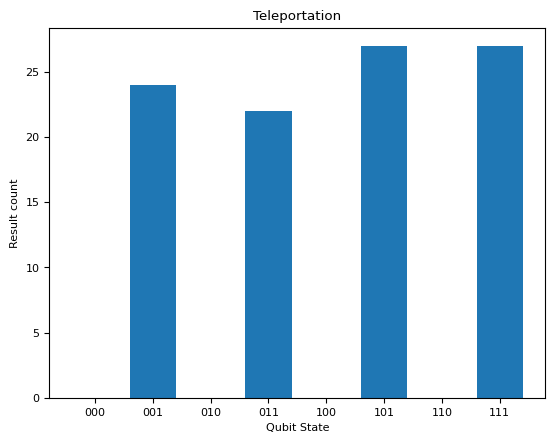

In [26]:
"""Simulate the teleportation circuit and get the final state of Bob's qubit."""
# Get a simulator.
sim = cirq.Simulator()

# Simulate the teleportation circuit.
result = sim.run(circuit, repetitions=100)

_ = cirq.plot_state_histogram(result, plt.subplot(), title = 'Teleportation', xlabel = 'Qubit State', ylabel = 'Result count', tick_label=binary_labels(3))
plt.show()

# Teleportation in Full

---


The full Teleportation protocol implementation and simulation is given in the 2 cells below. Complete the exercises based on these 2 cells.

In [27]:
#=========
# STEP #1
#=========
# Instantiate the circuit
circuit = cirq.Circuit()

# Define three qubits
msg = cirq.NamedQubit("Message")
alice = cirq.NamedQubit("Alice")
bob = cirq.NamedQubit("Bob")

# Create an entangled state between Alice and Bob's qubits
circuit.append([cirq.H(alice), cirq.CNOT(alice, bob)])


#=========
# STEP #2
#=========
# PREPARE THE |1> STATE
circuit.append([cirq.X(msg)])


#=========
# STEP #3
#=========
circuit.append([cirq.CNOT(msg, alice), cirq.H(msg), cirq.measure(msg, alice)])


#=============
# STEPS #4 - 5
#=============
circuit.append([cirq.CNOT(alice, bob), cirq.CZ(msg, bob), cirq.measure(bob)])

# You can visualize the circuit if needed
print(circuit)

Alice: ─────H───@───X───────M───@───────────
                │   │       │   │
Bob: ───────────X───┼───────┼───X───@───M───
                    │       │       │
Message: ───X───────@───H───M───────@───────


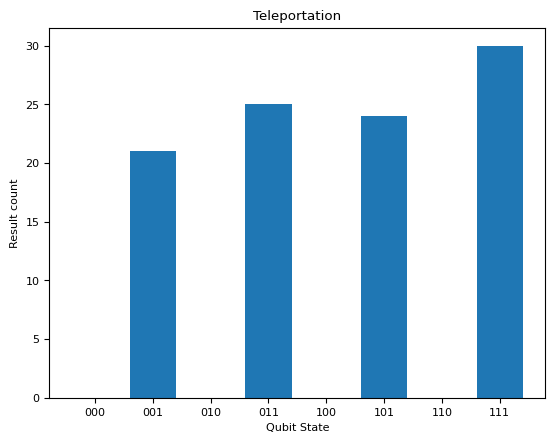

In [28]:
"""Simulate the teleportation circuit and get the final state of Bob's qubit."""
# Get a simulator.
sim = cirq.Simulator()

# Simulate the teleportation circuit.
result = sim.run(circuit, repetitions=100)

_ = cirq.plot_state_histogram(result, plt.subplot(), title = 'Teleportation', xlabel = 'Qubit State', ylabel = 'Result count', tick_label=binary_labels(3))
plt.show()


# Problem #2.1

---


**Independently**, modify the code above to teleport the  |+⟩  state. How do we make sure that the  |+⟩  state has indeed been teleported?

Hint: One way of doing this is by **reversing** the operations that we start with for the message qubit. To create the  |+⟩  state, we apply the Hadamard gate. To go from the  |+⟩  state to the  |0⟩  state, what gate can we use?

In [29]:
#=========
# STEP #1
#=========
# Instantiate the circuit
circuit = cirq.Circuit()

# Define three qubits
msg = cirq.NamedQubit("Message")
alice = cirq.NamedQubit("Alice")
bob = cirq.NamedQubit("Bob")

# Create an entangled state between Alice and Bob's qubits
circuit.append([cirq.H(alice), cirq.CNOT(alice, bob)])


#=========
# STEP #2
#=========
# PREPARE THE |+> STATE
circuit.append([cirq.H(msg)])


#=========
# STEP #3
#=========
circuit.append([cirq.CNOT(msg, alice), cirq.H(msg), cirq.measure(msg, alice)])


#=============
# STEPS #4 - 5
#=============
circuit.append([cirq.CNOT(alice, bob), cirq.CZ(msg, bob), cirq.measure(bob)])

# You can visualize the circuit if needed
print(circuit)

Alice: ─────H───@───X───────M───@───────────
                │   │       │   │
Bob: ───────────X───┼───────┼───X───@───M───
                    │       │       │
Message: ───H───────@───H───M───────@───────


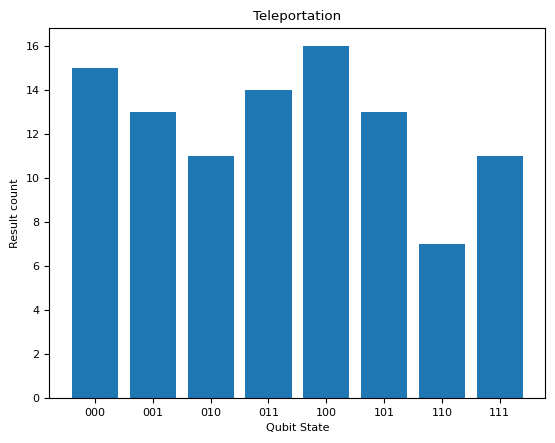

In [30]:
"""Simulate the teleportation circuit and get the final state of Bob's qubit."""
# Get a simulator.
sim = cirq.Simulator()

# Simulate the teleportation circuit.
result = sim.run(circuit, repetitions=100)

_ = cirq.plot_state_histogram(result, plt.subplot(), title = 'Teleportation', xlabel = 'Qubit State', ylabel = 'Result count', tick_label=binary_labels(3))
plt.show()

# Problem #2.2

---


Independently, modify the code above to teleport the  |−⟩  state. How do we make sure that the  |−⟩  state has indeed been teleported?

In [31]:
#=========
# STEP #1
#=========
# Instantiate the circuit
circuit = cirq.Circuit()

# Define three qubits
msg = cirq.NamedQubit("Message")
alice = cirq.NamedQubit("Alice")
bob = cirq.NamedQubit("Bob")

# Create an entangled state between Alice and Bob's qubits
circuit.append([cirq.H(alice), cirq.CNOT(alice, bob)])


#=========
# STEP #2
#=========
# PREPARE THE |-> STATE
circuit.append([cirq.H(msg)])
circuit.append(cirq.Z(msg))


#=========
# STEP #3
#=========
circuit.append([cirq.CNOT(msg, alice), cirq.H(msg), cirq.measure(msg, alice)])


#=============
# STEPS #4 - 5
#=============
circuit.append([cirq.CNOT(alice, bob), cirq.CZ(msg, bob), cirq.measure(bob)])

# You can visualize the circuit if needed
print(circuit)

Alice: ─────H───@───X───────M───@───────────
                │   │       │   │
Bob: ───────────X───┼───────┼───X───@───M───
                    │       │       │
Message: ───H───Z───@───H───M───────@───────


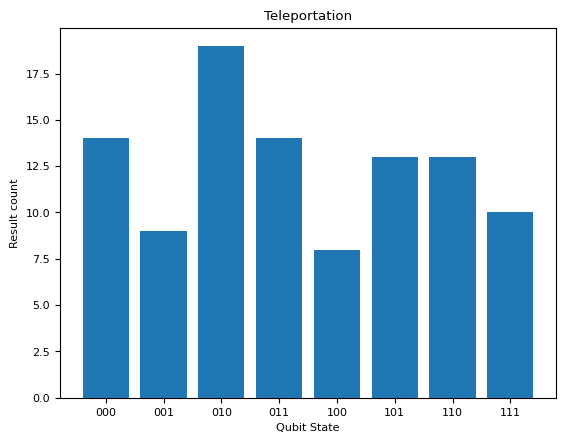

In [32]:
"""Simulate the teleportation circuit and get the final state of Bob's qubit."""
# Get a simulator.
sim = cirq.Simulator()

# Simulate the teleportation circuit.
result = sim.run(circuit, repetitions=100)

_ = cirq.plot_state_histogram(result, plt.subplot(), title = 'Teleportation', xlabel = 'Qubit State', ylabel = 'Result count', tick_label=binary_labels(3))
plt.show()

# Problem #2.3

---


Independently, change the order of Bob's X and Z gates in Step #5 and rerun the protocol. What happens to the results? Does the order of these gates matter?

In [33]:
#=========
# STEP #1
#=========
# Instantiate the circuit
circuit = cirq.Circuit()

# Define three qubits
msg = cirq.NamedQubit("Message")
alice = cirq.NamedQubit("Alice")
bob = cirq.NamedQubit("Bob")

# Create an entangled state between Alice and Bob's qubits
circuit.append([cirq.H(alice), cirq.CNOT(alice, bob)])


#=========
# STEP #2
#=========
# PREPARE THE |-> STATE
circuit.append([cirq.H(msg)])
circuit.append(cirq.Z(msg))


#=========
# STEP #3
#=========
circuit.append([cirq.CNOT(msg, alice), cirq.H(msg), cirq.measure(msg, alice)])


#=============
# STEPS #4 - 5
#=============
circuit.append([cirq.CZ(msg, bob), cirq.CNOT(alice, bob), cirq.measure(bob)])

# You can visualize the circuit if needed
print(circuit)

Alice: ─────H───@───X───────M───────@───────
                │   │       │       │
Bob: ───────────X───┼───────┼───@───X───M───
                    │       │   │
Message: ───H───Z───@───H───M───@───────────


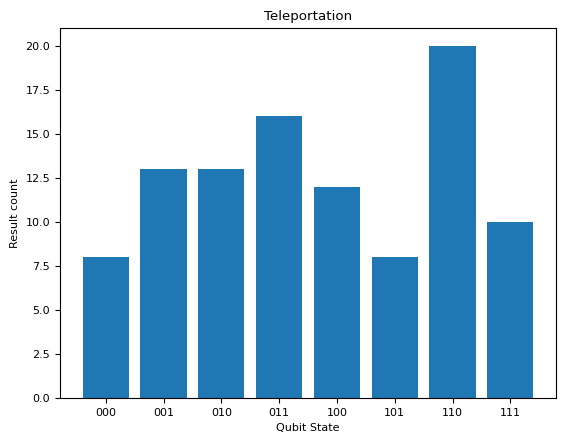

In [34]:
"""Simulate the teleportation circuit and get the final state of Bob's qubit."""
# Get a simulator.
sim = cirq.Simulator()

# Simulate the teleportation circuit.
result = sim.run(circuit, repetitions=100)

_ = cirq.plot_state_histogram(result, plt.subplot(), title = 'Teleportation', xlabel = 'Qubit State', ylabel = 'Result count', tick_label=binary_labels(3))
plt.show()